## Logistic regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [3]:
datafile = 'ex2/ex2data1.txt'
data = np.loadtxt(datafile, delimiter=',', usecols=(0,1,2), unpack=True)

In [4]:
X = np.column_stack((data[0], data[1]))
y = data[2].reshape(100, 1)

In [5]:
# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

In [6]:
# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

In [7]:
# Create linear regression object
classifier = OneVsRestClassifier(LogisticRegression())

In [8]:
# Train the model using the training sets
classifier.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [9]:
coef = classifier.coef_
intercept = classifier.intercept_

print "Coefficient: ", coef
print 'Intercept" ', intercept
print "Residual sum of squares: %.2f" % np.mean((classifier.predict(X_test) - y_test) ** 2)
print 'Variance score: %.2f' % classifier.score(X_test, y_test)

Coefficient:  [[ 0.03218681  0.02895144]]
Intercept"  [[-3.55005506]]
Residual sum of squares: 0.22
Variance score: 0.95


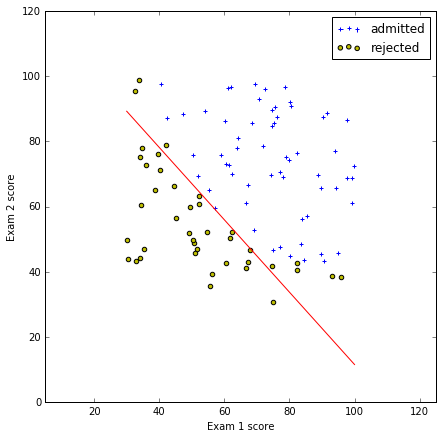

In [10]:
admitted = y == 1
rejected = y == 0

plt.figure(figsize=(7, 7))
plt.scatter(np.extract(admitted, data[0]), 
            np.extract(admitted, data[1]), 
            c='b', marker='+', label='admitted')
plt.scatter(np.extract(rejected, data[0]), 
            np.extract(rejected, data[1]), 
            c='y', marker='o', label='rejected')
plt.xlabel('Exam 1 score');
plt.ylabel('Exam 2 score');
plt.axes().set_aspect('equal', 'datalim')
plt.legend();

ex1 = np.linspace(30, 100, 100)
ex2 = -(coef[:, 0] * ex1 + intercept[:, 0]) / coef[:,1]
plt.plot(ex1, ex2, color='r', label='decision boundary');

In [11]:
theta = np.concatenate((intercept[0], coef[0]), axis=0)
freq = 1 / (1 + np.exp(-1 * np.dot(theta, [1, 45, 85])))
print "For a student with scores 45 and 85, we predict an admission probability of %f" % freq

For a student with scores 45 and 85, we predict an admission probability of 0.588853


## Regularized logistic regression

In [12]:
datafile = 'ex2/ex2data2.txt'
data = np.loadtxt(datafile, delimiter=',', usecols=(0,1,2), unpack=True)

In [17]:
def map_features(f1, f2, order=1):
    '''Map f1 and f2 to its higher order polynomial'''
    assert order >= 1
    def iter():
        for i in range(1, order + 1):
            for j in range(i + 1):
                yield np.power(f1, i - j) * np.power(f2, j)
    return np.vstack(iter())

In [29]:
out = map_features(data[0], data[1], order=6)
X = out.transpose()
y = data[2].reshape(118, 1)

In [30]:
# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

In [31]:
# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

In [36]:
# Logistic regression with lambda = 1 (C = 1/lambda)
classifier = OneVsRestClassifier(LogisticRegression(C=1))
# Train the model using the training sets
classifier.fit(X_train, y_train)
print 'Coefficents: ', classifier.coef_
print 'Intercept: ', classifier.intercept_
print 'Accuracy: ', classifier.score(X, y)

Coefficents:  [[ 0.04120363  0.81101487 -1.45037113 -0.45845393 -1.34568536 -0.0512512
  -0.28895897 -0.40553482 -0.16824519 -1.23058302  0.04489022 -0.54190083
  -0.11049438 -1.14228298 -0.34339153 -0.13120468 -0.03721863 -0.22097743
  -0.28334575 -0.38375011 -0.95830058  0.05344983 -0.24298371  0.06209436
  -0.2980842  -0.07238779 -0.85378223]]
Intercept:  [[ 1.49202505]]
Accuracy:  0.737288135593


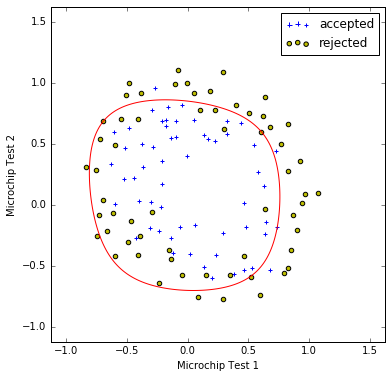

In [37]:
accepted = y == 1
rejected = y == 0

plt.figure(figsize=(6, 6))
plt.scatter(np.extract(accepted, data[0]), 
            np.extract(accepted, data[1]), 
            c='b', marker='+', label='accepted')
plt.scatter(np.extract(rejected, data[0]), 
            np.extract(rejected, data[1]), 
            c='y', marker='o', label='rejected')
plt.xlabel('Microchip Test 1');
plt.ylabel('Microchip Test 2');
plt.axes().set_aspect('equal', 'datalim')
plt.legend();

dim = np.linspace(-1, 1.5, 1000)
dx, dy = np.meshgrid(dim, dim)
v = map_features(dx.flatten(), dy.flatten(), order=6)
z = (np.dot(classifier.coef_, v) + classifier.intercept_).reshape(1000, 1000)
CS = plt.contour(dx, dy, z, levels=[0], colors=['r'])